<a href="https://colab.research.google.com/github/Tobifads/Image-recognition-Dog-or-Cat/blob/main/Image_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten
# from keras.preprocessing.image import ImageDataGenerator



In [ ]:
X_train = np.loadtxt('/content/drive/MyDrive/Data mining/input.csv', delimiter=',')
Y_train = np.loadtxt('/content/drive/MyDrive/Data mining/labels.csv', delimiter=',')

X_test = np.loadtxt('/content/drive/MyDrive/Data mining/input_test.csv',delimiter=',')
Y_test = np.loadtxt('/content/drive/MyDrive/Data mining/labels_test.csv',delimiter=',')


In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [ ]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)


In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [ ]:
X_train[1,:]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0


In [ ]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

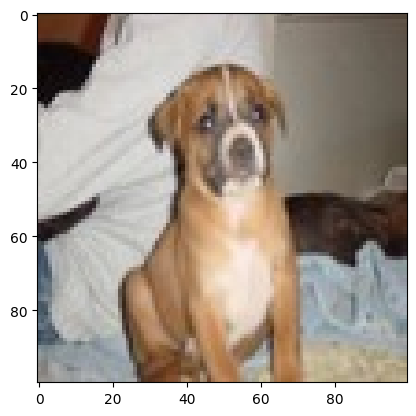

In [ ]:
import matplotlib.pyplot as plt
import random
idx= random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])


In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer ='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 798ms/step - accuracy: 0.7544 - loss: 0.5088
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 747ms/step - accuracy: 0.7976 - loss: 0.4295
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 752ms/step - accuracy: 0.8511 - loss: 0.3683
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 803ms/step - accuracy: 0.8681 - loss: 0.3143
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 829ms/step - accuracy: 0.9044 - loss: 0.2442


In [ ]:
model.evaluate( X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.6770 - loss: 0.6597


[0.6969240307807922, 0.6775000095367432]

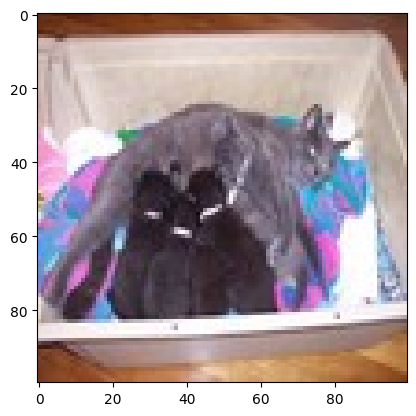

In [ ]:
idx2 = random.randint (0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()


In [ ]:
y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.7383849]]


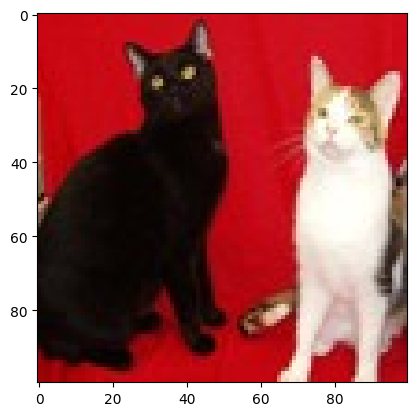

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The model prediction is a  Cat
[[0.87970227]]


In [ ]:

idx2 = random.randint (0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()
y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
if (y_pred > 0.5):
  pred = 'Cat'
else:
  pred = 'Dog'
print("The model prediction is a ", pred)
print(y_pred)


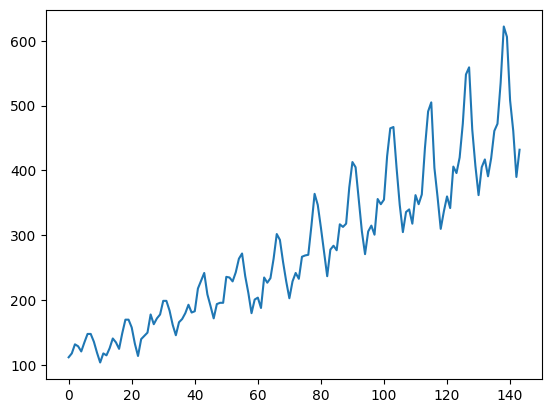

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/drive/MyDrive/Data mining/AirPassengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()


In [ ]:
dataset


,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# fix random seed for reproducibility
np.random.seed(7)


In [ ]:
dataset1 = dataset.values
dataset1 = dataset.astype('float32')


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset1 = scaler.fit_transform(dataset1)


In [ ]:
train_size = int(len(dataset1) * 0.67)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size,:],dataset1[train_size:len(dataset),:]
print(len(train), len(test))


96 48


In [ ]:
def create_dataset(dataset1, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset1)-look_back-1):
    a = dataset1[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset1[i + look_back, 0])
  return np.array(dataX), np.array(dataY)


In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 - 2s - 17ms/step - loss: 0.0393
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0189
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0145
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0133
Epoch 5/100
94/94 - 0s - 3ms/step - loss: 0.0123
Epoch 6/100
94/94 - 0s - 3ms/step - loss: 0.0113
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0102
Epoch 8/100
94/94 - 0s - 3ms/step - loss: 0.0092
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0082
Epoch 10/100
94/94 - 0s - 2ms/step - loss: 0.0072
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0063
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0054
Epoch 13/100
94/94 - 0s - 3ms/step - loss: 0.0046
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0039
Epoch 15/100
94/94 - 0s - 3ms/step - loss: 0.0034
Epoch 16/100
94/94 - 0s - 2ms/step - loss: 0.0030
Epoch 17/100
94/94 - 0s - 3ms/step - loss: 0.0027
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0024
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0023
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0022
Epoch 21/100
94/94 -

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 23.47 RMSE
Test Score: 51.87 RMSE
